<a href="https://colab.research.google.com/github/Andreabenitez8619/diplomado/blob/main/Copia_de_06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SALA 4

* Andrea Benítez Pineda
* Víctor Hugo Pacheco Valencia
* Mariela Bahena Ocampo
* Diego Aranda

# SVM

En esta notebook mostraremos el uso del clasificador **SVM** (Support Vector Machine). Realizaremos un ejemplo con datos artificiales, con fines didácticos, y un ejemplo más grande, con datos reales.

Usaremos la implementación de sklearn, llamada [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Classifier)

## Ejemplo 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Funciones que necesitamos para graficar las fronteras de decisión

In [ ]:
def make_meshgrid(x, y, h=.02):
    '''
    función para hacer la malla de puntos para colorear las regiones de decisión,
    la malla de puntos abarca la región donde se encuentran los puntos (x,y)
    'h' es el tamaño de paso
    '''
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### El conjunto de datos

Creamos un conjunto de datos con una condición XOR

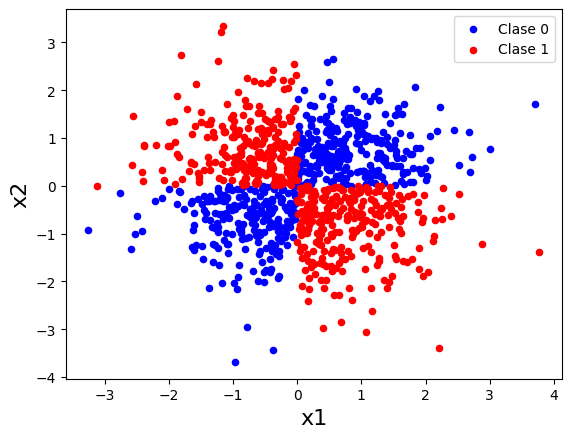

In [ ]:
np.random.seed(17) # Fijamos un seed para la reproducibilidad de resultados

X = np.random.randn(1000, 2)
Y = np.array([int(np.logical_xor(x[0] > 0, x[1] > 0)) for x in X])

plt.figure()
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=20, color='blue', label='Clase 0')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=20, color='red',label='Clase 1')
plt.legend()
plt.xlabel('x1',fontsize=16)
plt.ylabel('x2',fontsize=16)
plt.show()

Separamos el conjunto de datos en train y test.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2023)

print(f"X Train: {x_train.shape}")
print(f"X Test: {x_test.shape}")
print(f"Y Train: {y_train.shape}")
print(f"Y Test: {y_test.shape}")

X Train: (800, 2)
X Test: (200, 2)
Y Train: (800,)
Y Test: (200,)


### Clasificación

#### SVM lineal

Entrenemos el clasificador usando el kernel lineal. Observar que, por default, $C=1$.

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

Observemos el accuracy en el conjunto de entrenamiento y prueba. En este caso, el método `score` de la clase `SVC` calcula el accuracy.

In [ ]:
print(f"Training mean accuracy: {round(clf.score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf.score(x_test, y_test),3)}")

Training mean accuracy: 0.629
Test mean accuracy: 0.655


Observemos la frontera de decisión calculada por el clasificador y los conjuntos de entrenamiento y prueba.

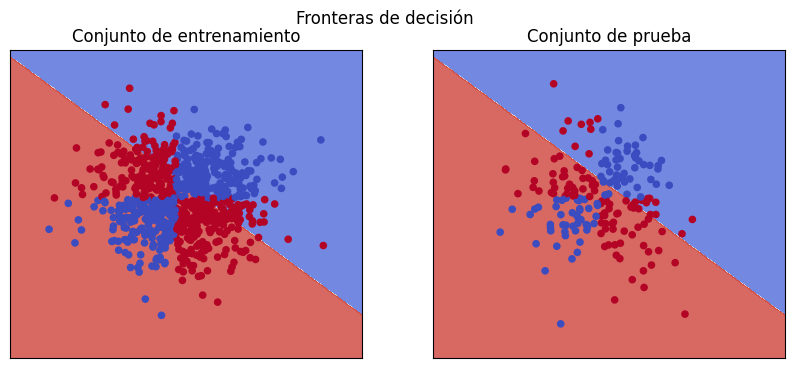

In [ ]:
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones
  
fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

#### ⭕ Probar otros kernels

Con los mismos conjuntos de prueba y entrenamiento:

1. Repetir el experimento de clasificación de arriba, usando otros kernels.
2. En cada caso que pruebes grafica los puntos (los de prueba) y la frontera de decisión.
3. En cada caso, reporta el valor de accuracy y recall, usando el conjunto de prueba solamente.

**¿Qué kernel parece dar mejor resultado?**

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

##Polinomial

In [ ]:
from sklearn.svm import SVC

clf2 = SVC(kernel='poly',degree=4) #grado 3 predeterminado
clf2.fit(x_train, y_train)

SVC(degree=4, kernel='poly')

Observemos el accuracy en el conjunto de entrenamiento y prueba. En este caso, el método `score` de la clase `SVC` calcula el accuracy.

In [ ]:
print(f"Training mean accuracy: {round(clf2.score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf2.score(x_test, y_test),3)}")

Training mean accuracy: 0.936
Test mean accuracy: 0.935


Observemos la frontera de decisión calculada por el clasificador y los conjuntos de entrenamiento y prueba.

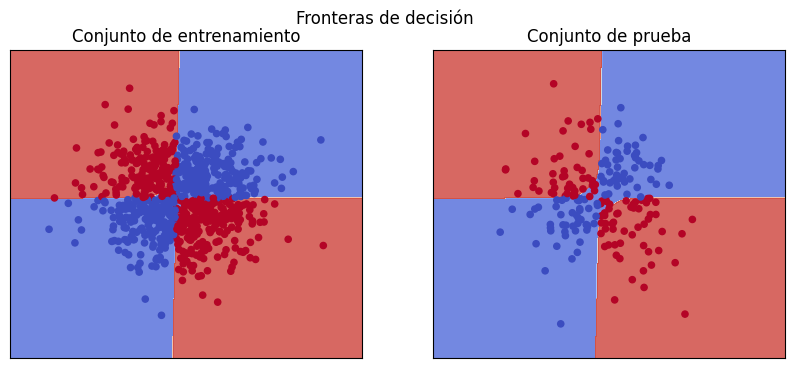

In [ ]:
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones
  
fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

* El kernel lineal es mejor para datos linealmente separables. Es una opción cuando el conjunto de datos es grande. 
* El kernel Gaussiano (RBF) tiende a dar buenos resultados cuando no se tiene información adicional sobre los datos.
* Los kernels polinomiales tienden a dar buenos resultados cuando los datos de entrenamiento están normalizados.

[El truco del kernel](https://www.geogebra.org/m/xawkavxe)

⭕ Prueba también con otros valores de `C` y repite los pasos de arriba, ¿qué efecto tiene el modificar este valor en la clasificación?

In [ ]:
from sklearn.svm import SVC

clf3 = SVC(kernel='rbf', gamma=4,C=1) #grado 3 predeterminado
clf3.fit(x_train, y_train)

SVC(C=1, gamma=4)

Observemos el accuracy en el conjunto de entrenamiento y prueba. En este caso, el método `score` de la clase `SVC` calcula el accuracy.

In [ ]:
print(f"Training mean accuracy: {round(clf3.score(x_train, y_train),3)}")
print(f"Test mean accuracy: {round(clf3.score(x_test, y_test),3)}")

Training mean accuracy: 0.976
Test mean accuracy: 0.975


Observemos la frontera de decisión calculada por el clasificador y los conjuntos de entrenamiento y prueba.

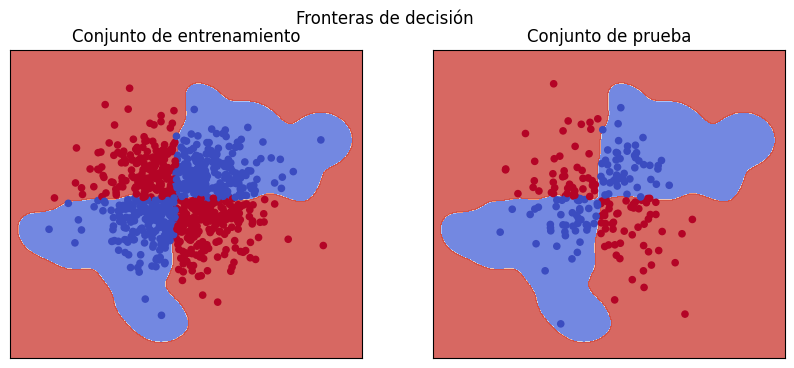

In [ ]:
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones
  
fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Conjunto de entrenamiento')

plot_contours(ax2, clf3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Conjunto de prueba')

plt.show()

### Usando gridsearch para encontrar los mejores parámetros

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) toma un estimador (por ejemplo, SVM) y un conjunto de parámetros del estimador. Sobre estos parámetros hace una busqueda para encontrar la combinación de parámetros que da mejores resultados en el estimador. 

GridSearchCV tiene métodos “fit” y “score” method, entre otros. Es decir, no es necesario tomar los parámetros e introducirlos en el estimador.

In [ ]:
from sklearn.model_selection import GridSearchCV

Encuentra los mejores parámetros para el clasificador SVM utilizando grid search. Guíate por el desempeño en el set de entrenamiento y validación.

Prueba los siguientes hyperparámetros.
* kernel = linear, polynomial, rbf
* C = 0.01, 0.1, 1.0, 10, 100
* grado del polinomio = 1, 2, 3, 4 (solo para el kernel polinomial)
* gamma = auto, scale:

Definimos los parámetros sobre los que se hará la busqueda

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ('linear', 'poly', 'rbf'),
              'degree': [1, 2, 3, 4], 'gamma': ('auto', 'scale')}
param_grid

{'C': [0.01, 0.1, 1, 10, 100],
 'kernel': ('linear', 'poly', 'rbf'),
 'degree': [1, 2, 3, 4],
 'gamma': ('auto', 'scale')}

Realizamos una busqueda sobre estos parámetros 

In [ ]:
clf = SVC()
gs = GridSearchCV(clf, param_grid)
gs.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4],
                         'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf')})

Veamos los mejores hiper-parámetros

In [ ]:
print(f"Best score: {gs.best_score_:.4f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.9850
Best params: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


Definamos un clasificador SVM con estos mejores hiperparámetros

In [ ]:
best_svm = SVC(C=100, kernel='poly', degree=2, gamma='auto')
best_svm.fit(x_train, y_train)

print(f"Train mean accuracy: {best_svm.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {best_svm.score(x_test, y_test):6.4f}")

Train mean accuracy: 0.9962
Test mean accuracy: 0.9950


Graficamos la frontera de decisión

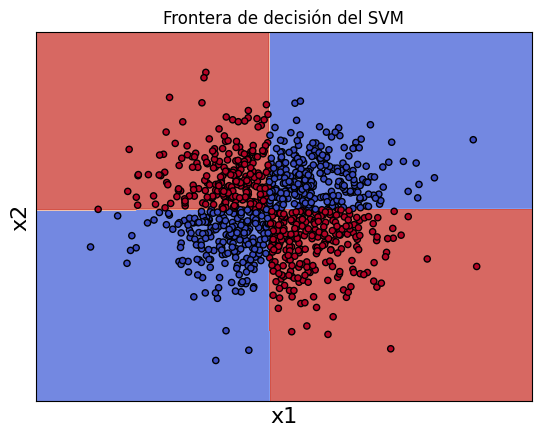

In [ ]:
xx, yy = make_meshgrid(X[:,0], X[:,1]) # Hacemos el grid para graficar las regiones

fig, ax = plt.subplots(dpi=100)  # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen
plot_contours(ax, best_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('x2', fontsize=16)
ax.set_xlabel('x1', fontsize=16)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Frontera de decisión del SVM')
plt.show()

### Comparando el SVM lineal con el OLS (clasificador lineal)

En este ejercicio vamos a comparar la clasificación y la frontera de decisión del clasificador de la sesión anterior (discriminante lineal OLS) con el SVM con kernel lineal.

Para esto, vamos a usar ambos clasificadores en el mismo conjunto de datos. Después, compararemos la frontera de decisión.

Dado que el clasificador lo implementamos como una clase, podemos usarlo en esta notebook directamente. Hay dos maneras de hacerlo:

* Copiando el código y definiendo la clase otra vez:
* Descargando el archivo desde github:

In [ ]:
url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/02-Machine-Learning/data/clasificador_lineal.py"
!wget --no-cache --backups=1 {url}

--2023-05-02 02:23:17--  https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/02-Machine-Learning/data/clasificador_lineal.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 840 [text/plain]
Saving to: ‘clasificador_lineal.py’

clasificador_lineal 100%[===================>]     840  --.-KB/s    in 0s      

2023-05-02 02:23:18 (28.6 MB/s) - ‘clasificador_lineal.py’ saved [840/840]



Ya está copiado en la misma carpeta donde estamos trabajando por lo que ya lo podemos importar directamente

In [ ]:
from clasificador_lineal import LeastSquaresClassifier

Definimos el conjunto de datos, usaremos un dataset de scikit-learn:

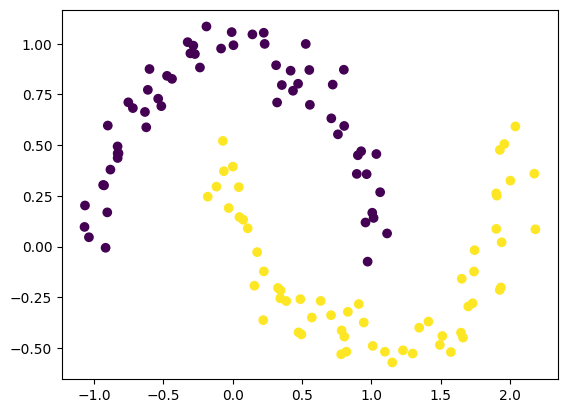

In [ ]:
from sklearn.datasets import make_moons

x_train, y_train = make_moons(n_samples = 120, random_state=89, noise=0.1)

#--- Lo graficamos para verlo ---
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

⭕ Realiza la clasificación usando el clasificador OLS y grafica la frontera de decisión.

Puedes usar el código para clasificar y graficar que usamos en la sesión anterior

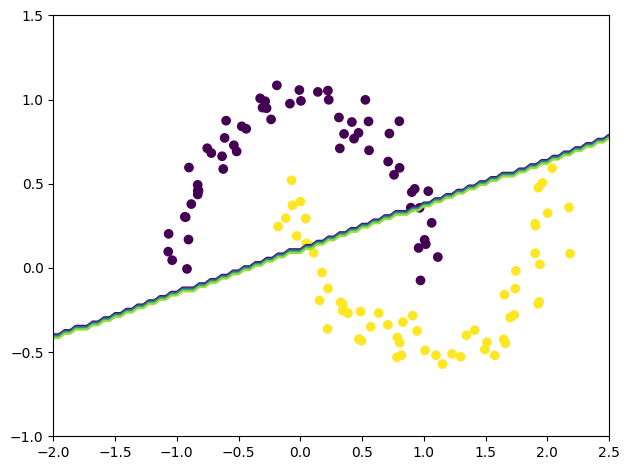

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x1_test, x2_test = np.meshgrid(np.linspace(-2, 2.5, 100), np.linspace(-1, 1.5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

features = PolynomialFeatures(1)
X_train = features.fit_transform(x_train)
X_test = features.fit_transform(x_test)

#------ COMPLETAR ------
modelo = LeastSquaresClassifier()   
modelo.fit(X_train,y_train)          
y_ols = modelo.clasifica(X_test)
#----------------------

plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contour(x1_test, x2_test, y_ols.reshape(100, 100))
plt.tight_layout()
plt.show()

⭕ Ahora, usemos SVM lineal

Realiza la clasificación en el mismo dataset, usando SVM con kernel lineal y grafica la frontera de decisión. Puedes usar el código para clasificar y graficar que usamos anteriormente.

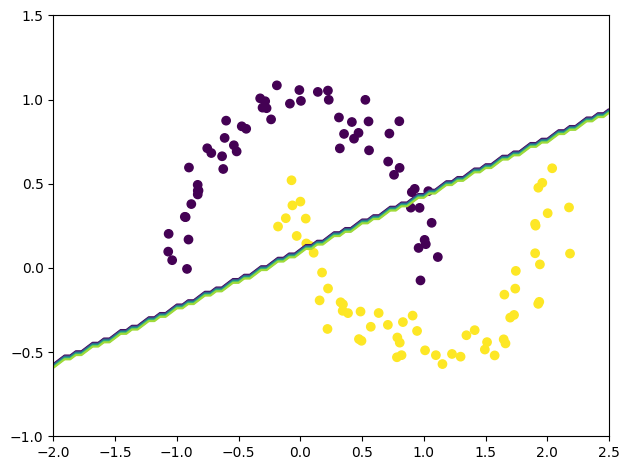

In [ ]:
x1_test, x2_test = np.meshgrid(np.linspace(-2, 2.5, 100), np.linspace(-1, 1.5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

#------ COMPLETAR ------
lin_svm = SVC(kernel='linear')
lin_svm.fit(x_train, y_train)
y_svm = lin_svm.predict(x_test)
#----------------------

plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contour(x1_test, x2_test, y_svm.reshape(100, 100))
plt.tight_layout()
plt.show()


Dibujamos ambas FD juntas. 

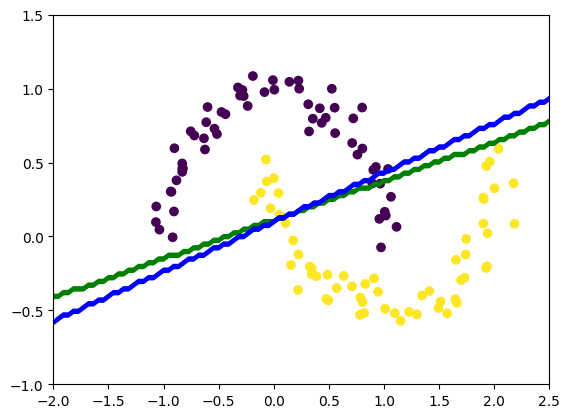

In [ ]:
plt.figure()
#-----Dibujar los datos---------------------------------
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
#-----Dibujar X_test (la malla de fondo para ver las regiones ------------
plt.contour(x1_test, x2_test, y_ols.reshape(100, 100),colors='green')
plt.contour(x1_test, x2_test, y_svm.reshape(100, 100),colors='blue')
plt.show()

Observar que no son la misma.

🔵 ¿Por qué no? \
ols=minimos errores al cuadrado \
svm= grados de olgura,

## Ejemplo 2

Para este problema usaremos el datset de Kaggle.

**Contexto**

Los conjuntos de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está altamente desequilibrado, la clase positiva (fraudes) representa el 0.172% de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no se pueden obtener las características originales y más información de fondo sobre los datos. Las características $V_1$, $V_2$, ..., $V_{28}$ son los componentes principales obtenidos con PCA, las únicas características que no se han transformado con PCA son 'Tiempo' y 'Cantidad'. La función 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La característica 'Cantidad' es la Cantidad de la transacción, esta característica se puede utilizar para el aprendizaje sensible al costo dependiente del ejemplo. La característica 'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.


Recordemos las buenas prácticas del Machine Learning: https://scikit-learn.org/stable/common_pitfalls.html

In [ ]:
!apt-get -qq install > /dev/null subversion

!svn checkout "https://github.com/DCDPUAEM/DCDP/trunk/02-Machine-Learning/data/"

Checked out revision 188.


Extraer el archivo zip

In [ ]:
import numpy as np
from zipfile import ZipFile 
import pandas as pd
# pd.options.mode.chained_assignment = None

archivo = "/content/data/creditcard.zip"

print('Extrayendo contenido...') 
with ZipFile(archivo, 'r') as Zip: 
    Zip.extractall() 
    print('Extracción finalizada.') 

credito = pd.read_csv("creditcard.csv")

Extrayendo contenido...
Extracción finalizada.


In [ ]:
credito.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credito.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


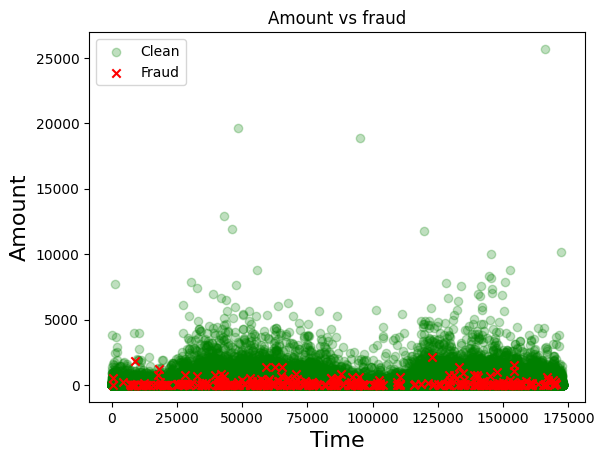

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

# Graficamos los que no son fraude
time_amount = credito[credito['Class'] == 0][['Time','Amount']].values
plt.scatter(time_amount[:,0], time_amount[:,1], 
            c='green',alpha=0.25,label='Clean')
# Graficamos los que sí son fraude
time_amount = credito[credito['Class'] == 1][['Time','Amount']].values
plt.scatter(time_amount[:,0], time_amount[:,1], 
            c='red',label='Fraud',marker='x')
plt.legend(loc='best')
plt.title('Amount vs fraud')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amount', fontsize=16)
plt.show()

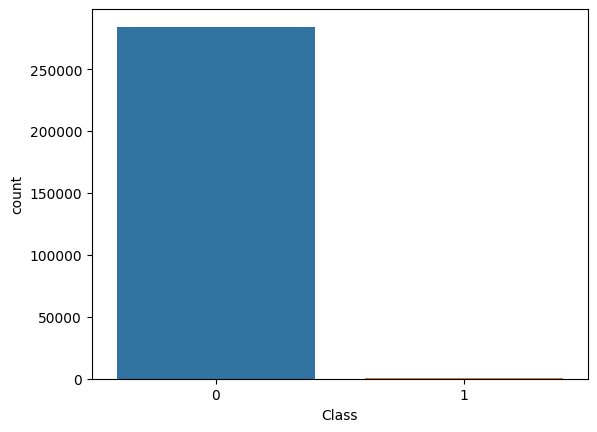

In [ ]:
import seaborn as sns

plt.figure()
sns.countplot(x = "Class", data = credito)
plt.show()

In [ ]:
No_of_frauds = credito[credito["Class"]==1].shape[0]
No_of_normals = credito[credito["Class"]==0].shape[0]
print("Hay {} transacciones normales (clase 0)".format(No_of_normals))
print("Hay {} transacciones fraudulentas (clase 1)".format(No_of_frauds))
total = No_of_frauds + No_of_normals
pf= (No_of_frauds / total)*100
pn= (No_of_normals / total)*100
print("Porcentaje clase 0 = {}%".format(np.round(pn,2)))
print("Porcentaje clase 1 = {}%".format(np.round(pf,2)))

Hay 284315 transacciones normales (clase 0)
Hay 492 transacciones fraudulentas (clase 1)
Porcentaje clase 0 = 99.83%
Porcentaje clase 1 = 0.17%


### Submuestro

Se necesita hacer un submuestreo para balancear las clases

* Está claro que la Clase 1 está subrepresentada ya que solo  representa el 0.17% de todo el conjunto de datos. 
* Si entrenamos nuestro modelo usando este conjunto de datos, el modelo será ineficiente y será entrenado para predecir solo la Clase 0 porque no tendrá suficientes datos de entrenamiento.
* Podemos obtener una alta exactitud al probar el modelo, pero no debemos confundirnos con esto porque nuestro conjunto de datos no tiene datos de prueba equilibrados. Por lo tanto, tenemos que confiar en el recall que se basa en TP y FP.
* En los casos en que tengamos datos asimétricos, agregar datos adicionales de la característica subrepresentada (sobremuestreo) es una opción, mediante la modelación de la distribución de los datos. Por ahora no tenemos esa opción, así que tendremos que recurrir al submuestreo.
* El submuestreo del conjunto de datos implica mantener todos nuestros datos subrepresentados (Clase 1) mientras se muestrea el mismo número de características de la Clase 0 para crear un nuevo conjunto de datos que comprenda una representación igual de ambas clases.

Obtenemos un conjunto de datos más balanceado que contenga el doble de instancias no fraudulentas respecto a las fraudulentas

In [ ]:
# lista los índices de fraude del data set completo
fraud_idxs = credito[credito["Class"]==1].index.to_list()

# lista de índices normales del data set completo
normal_idxs = credito[credito["Class"]==0].index.to_list()

# seleccionamos aleatoriamente el doble de índices de transacciones normales que de normales
random_normal_idxs = np.random.choice(normal_idxs, No_of_frauds*2, replace= False)
# random_normal_idxs = np.array(random_normal_idxs)

# concatenamos los índices fraudulentos y normales y creamos el dataframe sub-sampleado
undersampled_indices = np.concatenate([fraud_idxs, random_normal_idxs])
undersampled_data = credito.iloc[undersampled_indices, :]

print(f"Fraude: {len(fraud_idxs)}, Normales: {len(random_normal_idxs)}")
undersampled_data.head()

Fraude: 492, Normales: 984


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Comprobemos que los datos quedaron balanceados

Número de transacciones normales (clase 0):  984
Número de transacciones fraudulentas (clase 1):  492
Número total de instancias:  1476
Porcentaje clase 0: 66.67
Porcentaje clase 1: 33.33


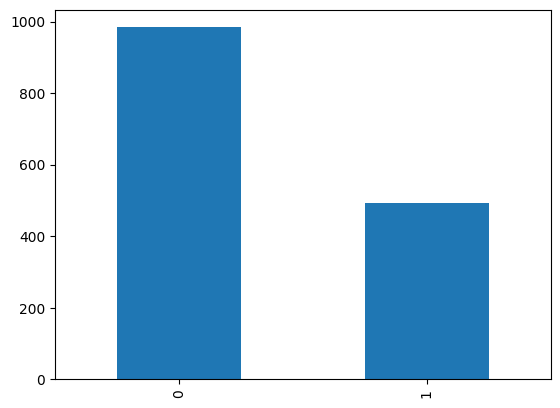

In [ ]:
No_of_frauds_sampled = len(undersampled_data[undersampled_data["Class"]== 1])

No_of_normals_sampled = len(undersampled_data[undersampled_data["Class"]== 0])

print("Número de transacciones normales (clase 0): ", No_of_normals_sampled)
print("Número de transacciones fraudulentas (clase 1): ", No_of_frauds_sampled)
total_sampled = No_of_frauds_sampled + No_of_normals_sampled
print("Número total de instancias: ", total_sampled)

Fraud_percent_sampled = (No_of_frauds_sampled / total_sampled)*100
Normal_percent_sampled = (No_of_normals_sampled / total_sampled)*100
print(f"Porcentaje clase 0: {round(Normal_percent_sampled,2)}")
print(f"Porcentaje clase 1: {round(Fraud_percent_sampled,2)}")

count_sampled = pd.value_counts(undersampled_data["Class"], sort= True)
count_sampled.plot(kind= 'bar')
plt.show()

In [ ]:
# quitamos las columnas "Time" y "Amount"
undersampled_data.drop(["Time"], axis= 1,inplace=True)

<ipython-input-35-da607f93347b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undersampled_data.drop(["Time"], axis= 1,inplace=True)


### Oversampling

Ahora haremos un proceso llamado [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/abs/1106.1813)


Para ello necesitamos instalar la librería de _aprendizaje desequilibrado_ ``imbalanced-learn`` de Python

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Podemos imprimir información sobre el módulo

In [ ]:
import imblearn
print(imblearn.__version__)

0.10.1


Obtenemos la matriz de datos $X$ y el vector de clases $y$ correspondiente

In [ ]:
X = undersampled_data.loc[:, undersampled_data.columns != "Class"].values
y = undersampled_data.loc[:, undersampled_data.columns == "Class"].values

print(f"Matriz de features: {X.shape}")
print(f"Matriz de etiquetas: {y.shape}")

Matriz de features: (1476, 29)
Matriz de etiquetas: (1476, 1)


Hagamos el proceso de sobre-muestreo [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_oversampled, y_oversampled = oversample.fit_resample(X, y)

Verifiquemos la cantidad de datos ahora

In [ ]:
from collections import Counter

print(f"Matriz de features: {X_oversampled.shape}")
print(f"Matriz de etiquetas: {y_oversampled.shape}")

print(Counter(y_oversampled))

Matriz de features: (1968, 29)
Matriz de etiquetas: (1968,)
Counter({1: 984, 0: 984})


### Crear el conjunto de entrenamiento y prueba

Separamos los datos en datos de entrenamiento (75%) y prueba (25%) 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, 
                                                    test_size = 0.25, 
                                                    random_state = 359)

print("The split of the under_sampled data is as follows")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

The split of the under_sampled data is as follows
X_train:  1476
X_test:  492
y_train:  1476
y_test:  492


### Re-escalemos los datos

In [ ]:
from sklearn import preprocessing

sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

⭕ Elige una SVM y entrénalo con un conjunto de parámetros de tu elección. Obtener el accuracy usando el método `score` del clasificador.

In [ ]:
classifier = SVC(C=1, kernel= 'rbf', random_state=0, gamma='scale')
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

0.959349593495935

### Prueba el modelo 

Realiza las predicciones con el conjunto de prueba y bserva la matriz de confusión.

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print(CM)

[[233   3]
 [ 24 232]]


También podemos calcular las métricas de rendimiento *manualmente*.

In [ ]:
acc = round((CM[1,1]+CM[0,0])/(CM[0,0] + CM[0,1]+CM[1,0] + CM[1,1])*100,3)
rec = round(CM[1,1]/(CM[1,0] + CM[1,1])*100,3)

print(f"Accuracy: {acc}")
print(f"Recall: {rec}")

Accuracy: 94.512
Recall: 90.625


⭕ Calcula también el *F1-score* y el *precision score*

### Aplica GridSearch para obtener los mejores parámetros para una SVM 

In [ ]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
              ]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("The best accuracy using gridSearch is", best_accuracy)

best_parameters = grid_search.best_params_
print("The best parameters for using this model is", best_parameters)

The best accuracy using gridSearch is 0.9559711406321576
The best parameters for using this model is {'C': 10, 'kernel': 'linear'}


### Utiliza los mejores parámetros para probar de nuevo tu modelo

In [ ]:
classifier_with_best_parameters =  SVC(C= best_parameters["C"], 
                                       kernel= best_parameters["kernel"], 
                                       random_state= 0)
classifier_with_best_parameters.fit(X_train, y_train)

y_pred_best_parameters = classifier_with_best_parameters.predict(X_test)

CM2 = confusion_matrix(y_test, y_pred_best_parameters)
print(CM2)

[[229   7]
 [ 17 239]]


⭕ Calcula las métricas de rendimiento: Accuracy, Recall, F1-score, Precision

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred_best_parameters)}")
print(f"Recall: {recall_score(y_test, y_pred_best_parameters)}")
print(f"Precision: {precision_score(y_test, y_pred_best_parameters)}")
print(f"f1 score: {f1_score(y_test, y_pred_best_parameters)}")

Accuracy: 0.9512195121951219
Recall: 0.93359375
Precision: 0.9715447154471545
f1 score: 0.9521912350597609




---



### ⭕ Práctica

### ⭕ Práctica

La práctica consiste en dos ejercicios:

1. Usa el modelo anterior (**no lo vuelvas a entrenar**) para obtener las predicciones en todos el conjunto de datos original. Reporta las 4 métricas de rendimiento, así como la matriz de confusión. *Hint*: Puedes usar un pipeline para facilitar el proceso.

2. Usa el clasificador lineal OLS con el conjunto de datos entrenamiento balanceado usado en la sesión (el de tamaño 1476). Reporta las 4 métricas de rendimiento, así como la matriz de confusión.

3. Entrena un nuevo clasificador SVM en todo el conjunto sesgado. 

    3.1. Separa el conjunto completo en 75% de entrenamiento y 20% de prueba.

    3.2. Entrena un nuevo modelo en este nuevo conjunto de entrenamiento y obten las predicciones en el conjunto de prueba. 
    
    3.3 Reporta las 4 métricas de rendimiento, así como la matriz de confusión. 
    
    Puedes usar técnicas de re-escalamiento, gridsearch, selección de features. Puedes usar un pipeline para facilitar el proceso.

Redacta una conclusión comparando el desempeño de la parte 1 y la parte 3.

1. **Usa el modelo anterior (no lo vuelvas a entrenar) para obtener las predicciones en todos el conjunto de datos original. Reporta las 4 métricas de rendimiento, así como la matriz de confusión. Hint: Puedes usar un pipeline para facilitar el proceso.**

In [ ]:
credito.drop(["Time"], axis= 1,inplace=True)
credito

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


1. **Usa el modelo anterior (**no lo vuelvas a entrenar**) para obtener las predicciones en todos el conjunto de datos original. Reporta las 4 métricas de rendimiento, así como la matriz de confusión. *Hint*: Puedes usar un pipeline para facilitar el proceso.**

___

In [ ]:
X_credito = credito.drop('Class',axis= 1)
y_credito = credito['Class']

print(f"Matriz de features: {X_credito.shape}")
print(f"Matriz de etiquetas: {y_credito.shape}")

Matriz de features: (284807, 29)
Matriz de etiquetas: (284807,)


In [ ]:
"""
classifier_with_best_parameters =  SVC(C= 100, 
                                       kernel= 'linear', 
                                       random_state= 0)
classifier_with_best_parameters.fit(X_train, y_train)
"""
y_pred_best = classifier_with_best_parameters.predict(X_credito)

CM2 = confusion_matrix(y_credito, y_pred_best)


print(CM2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


[[  4340 279975]
 [     0    492]]


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print(f"Accuracy: {accuracy_score(y_credito, y_pred_best)}")
print(f"Recall: {recall_score(y_credito, y_pred_best)}")
print(f"Precision: {precision_score(y_credito, y_pred_best)}")
print(f"f1 score: {f1_score(y_credito, y_pred_best)}")

Accuracy: 0.01696587513649594
Recall: 1.0
Precision: 0.0017542170736664206
f1 score: 0.0035022903697692546


⭕ Usa el clasificador lineal OLS con el conjunto de datos entrenamiento balanceado usado en la sesión (el de tamaño 1476). Reporta las 4 métricas de rendimiento, así como la matriz de confusión.



In [ ]:
print("The split of the under_sampled data is as follows")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

The split of the under_sampled data is as follows
X_train:  1476
X_test:  492
y_train:  1476
y_test:  492


In [ ]:
print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((1476, 29), (1476,))
Prueba: ((492, 29), (492,))


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing


sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)



features = PolynomialFeatures(1)
x_train_2 = features.fit_transform(X_train)
x_test_2 = features.fit_transform(X_test)

#------ ------
modelo2 = LeastSquaresClassifier()   
modelo2.fit(x_train_2,y_train)          
y_ols2 = modelo2.clasifica(x_test_2)
#----------------------


In [ ]:
CM3 = confusion_matrix(y_test, y_ols2)


print(CM3)

[[232   4]
 [ 33 223]]


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print(f"Accuracy: {accuracy_score(y_test, y_ols2)}")
print(f"Recall: {recall_score(y_test, y_ols2)}")
print(f"Precision: {precision_score(y_test, y_ols2)}")
print(f"f1 score: {f1_score(y_test, y_ols2)}")

Accuracy: 0.9247967479674797
Recall: 0.87109375
Precision: 0.9823788546255506
f1 score: 0.9233954451345756


2. **Entrena un nuevo clasificador SVM en todo el conjunto sesgado.**

    2.1. Separa el conjunto completo en 75% de entrenamiento y 25% de prueba.

    


In [ ]:
from sklearn.model_selection import train_test_split


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_credito, y_credito, 
                                                    test_size = 0.25, 
                                                    random_state = 123,
                                                    stratify=y_credito)

print("X_train: ", len(X_train_2))
print("X_test: ", len(X_test_2))
print("y_train: ", len(y_train_2))
print("y_test: ", len(y_test_2))

print(f"Entrenamiento: {X_train_2.shape,y_train_2.shape}")
print(f"Prueba: {X_test_2.shape,y_test_2.shape}")

X_train:  213605
X_test:  71202
y_train:  213605
y_test:  71202
Entrenamiento: ((213605, 29), (213605,))
Prueba: ((71202, 29), (71202,))


2.2. **Entrena un nuevo modelo en este nuevo conjunto de entrenamiento y obten las predicciones en el conjunto de prueba.**
    
    

##Polinomial

In [ ]:
from sklearn.svm import SVC

clf3 = SVC(kernel='poly',degree=4) #grado 3 predeterminado
clf3.fit(X_train_2, y_train_2)

SVC(degree=4, kernel='poly')

Observemos el accuracy en el conjunto de entrenamiento y prueba. En este caso, el método `score` de la clase `SVC` calcula el accuracy.

In [ ]:
print(f"Training mean accuracy: {round(clf3.score(X_train_2, y_train_2),3)}")
print(f"Test mean accuracy: {round(clf3.score(X_test_2, y_test_2),3)}")

Training mean accuracy: 0.998
Test mean accuracy: 0.998


### Prueba el modelo 

Realiza las predicciones con el conjunto de prueba y se observa la matriz de confusión.

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_2 = classifier.predict(X_test_2)
CM4 = confusion_matrix(y_test_2, y_pred_2)
print(CM4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


[[  433 70646]
 [    0   123]]


2.3 **Reporta las 4 métricas de rendimiento, así como la matriz de confusión.**
    
    Puedes usar técnicas de re-escalamiento, gridsearch, selección de features. Puedes usar un pipeline para facilitar el proceso.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print(f"Accuracy: {accuracy_score(y_test_2, y_pred_2)}")
print(f"Recall: {recall_score(y_test_2, y_pred_2)}")
print(f"Precision: {precision_score(y_test_2, y_pred_2)}")
print(f"f1 score: {f1_score(y_test_2, y_pred_2)}")

Accuracy: 0.007808769416589422
Recall: 1.0
Precision: 0.001738049145812432
f1 score: 0.003470067144388648


## RBF

In [ ]:
from sklearn import preprocessing

sc2 = preprocessing.StandardScaler()
X_train_2 = sc2.fit_transform(X_train_2)
X_test_2 = sc2.transform(X_test_2)

⭕ Elección del SVM y entrenamiento.

In [ ]:
classifier1 = SVC(C=10, kernel= 'rbf', random_state=0, gamma='scale')
classifier1.fit(X_train_2, y_train_2)



In [ ]:
print(classifier1.score(X_train_2, y_train_2))
print(classifier1.score(X_test_2, y_test_2))

0.9998267830809204
0.9994382180275835


### Prueba el modelo 

Realiza las predicciones con el conjunto de prueba y bserva la matriz de confusión.

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_rbf = classifier1.predict(X_test_2)
CM_rbf = confusion_matrix(y_test_2, y_pred_rbf)
print(CM_rbf)

[[71076     3]
 [   37    86]]


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print(f"Accuracy: {accuracy_score(y_test_2, y_pred_rbf)}")
print(f"Recall: {recall_score(y_test_2, y_pred_rbf)}")
print(f"Precision: {precision_score(y_test_2, y_pred_rbf)}")
print(f"f1 score: {f1_score(y_test_2, y_pred_rbf)}")

Accuracy: 0.9994382180275835
Recall: 0.6991869918699187
Precision: 0.9662921348314607
f1 score: 0.8113207547169811


#1. 
**SVC(C= 10, kernel= 'linear', random_state= 0)**\

Matriz de confusión\
[[  **4340** 279975] \
 [     0    **492**]] \
Accuracy: 0.01696587513649594 \
Recall: 1.0 \
Precision: 0.0017542170736664206 \
f1 score: 0.0035022903697692546 \


#3. 
**Polinomio grado 4.**

Matriz de confusión\
[[  **433**  70646] \
 [    0    **123**]] \

Training mean accuracy: 0.998\
Test mean accuracy: 0.998 \

Accuracy: 0.007808769416589422 \
Recall: 1.0\
Precision: 0.001738049145812432\
f1 score: 0.003470067144388648 \

**RBF C=10, kernel= 'rbf', random_state=0, gamma='scale'** \
Matriz de confusión \
[[**71076**     3] \
 [   37    **86**]] \
Training mean accuracy: 0.9998267830809204 \
Test mean accuracy: 0.9994382180275835 \

Accuracy: 0.9994382180275835 \
Recall: 0.6991869918699187 \
Precision: 0.9662921348314607 \
f1 score: 0.8113207547169811 \

###Conclusiones:
Al entrenar dos modelos adicionales en el conjunto sesgado se obtuvieron mejores métricas con el modelo **RBF**. 
Al relizar un pipeline y aplicar GridSearch para obtener los mejores parámetros para una SVM no se obtuvieron resultados, ya que la problemática a la cual nos enfrentamos fue el tiempo que tardo en copilar.

